In [1]:
import model_training

from hamilton import driver
from hamilton.io.materialization import to

In [2]:
dag_config = {
    "test_size_fraction": 0.95,
    "shuffle_train_test_split": True,
    "data_loader" : "digits",
    "clf" : "svm",
    "penalty" : "l2"
}
dr = (
    driver.Builder()
    .with_config(dag_config)
    .with_modules(model_training)
    .build()
)

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


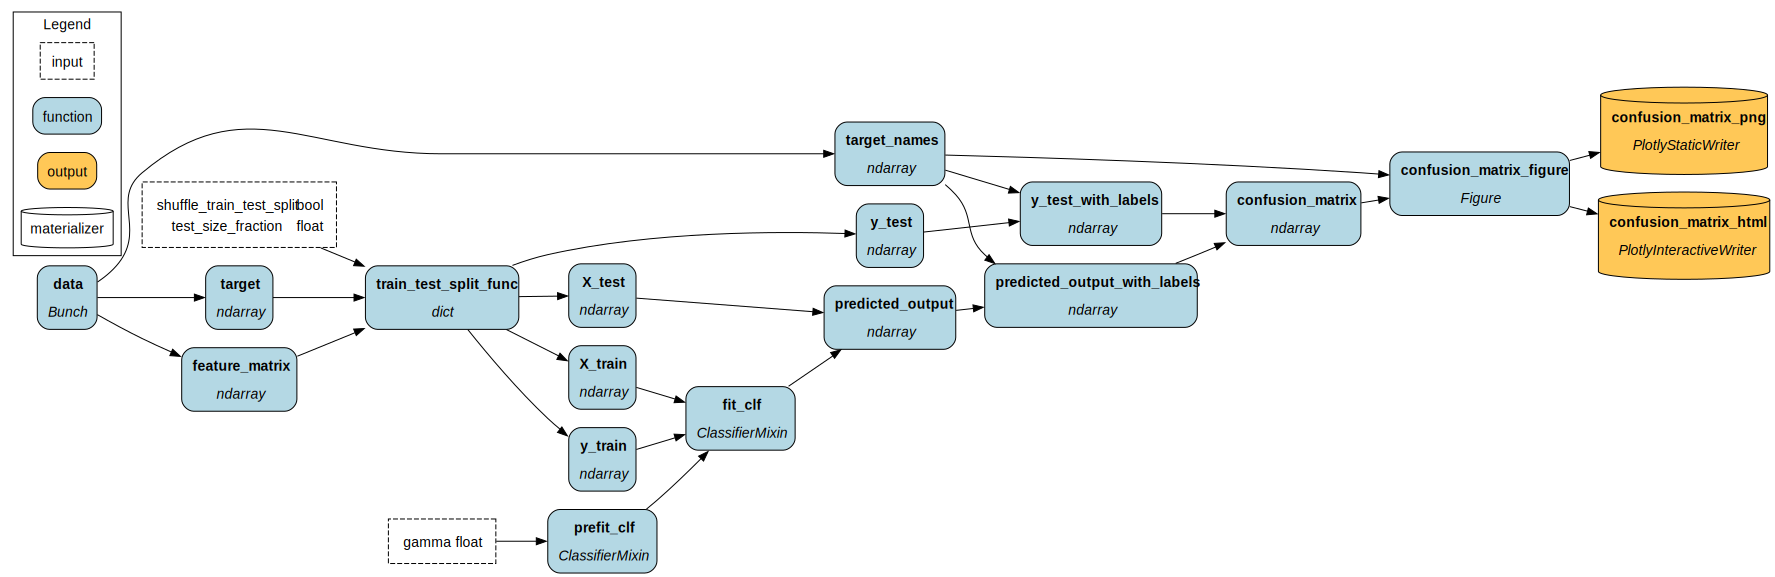

In [3]:
materializers = [
        to.plotly(
            dependencies=["confusion_matrix_figure"],
            id="confusion_matrix_png",
            path="./static.png",
        ),
        to.html(
            dependencies=["confusion_matrix_figure"],
            id="confusion_matrix_html",
            path="./interactive.html",
        ),
    ]

dr.visualize_materialization(*materializers)

In [4]:
dr.materialize(*materializers)

({'confusion_matrix_png': {'size': 29058,
   'path': './static.png',
   'last_modified': 1700461289.1922433,
   'timestamp': 1700490089.192551},
  'confusion_matrix_html': {'size': 3607064,
   'path': './interactive.html',
   'last_modified': 1700461289.2231884,
   'timestamp': 1700490089.425375}},
 {})